###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2021 Adam Wickenheiser

# What is Entropy and How to Use it to Determine Thermodynamic Efficiency

In the previous lesson, we saw how to define the *thermodynamic efficiency* of a cycle if the total work and heat transfer of each step in the cycle is known.  This is a "systems-level" view of a thermodynamic system: at this point we aren't concerned with the details of the process, just the overall inputs and outputs.  Just like most engineering design processes, it makes sense to start with the overall goals (i.e. what do we want the system to *do*), and then iterate on ways to make it happen (or revise the goals if needed!).

In this lesson, we introduce the thermodynamic property called *entropy*.  Colloquially, you may have used this term to mean "disorder", e.g. that we have to constantly "fight" against entropy increase, which happens naturally if we don't regularly clean, organize, and generally take care of our surroundings.  We will discuss the physical basis for entropy by connecting it to reversible and irreversible processes, as discussed in the previous lesson.  Indeed, the more irreversible the process is, the more entropy is "generated".  To keep tabs on how much entropy is generated, we will show that it is a thermodynamic property, just like temperature and pressure, and calculate changes in this property for different processes.

## Learning objectives:

1. To be able to calculate entropy at different thermodynamic states.
1. To be able to plot thermodynamic processes on Temperature-Entropy diagrams.
1. To be able to use approximate formulas for entropy change and compare them to exact calculations.
1. To be able to calculate the isentropic efficiency of a steady flow component in a thermodynamic cycle.
1. To be able to balance entropy input, output, and generation in a thermodynamic process.

## Contents:

1. [How do we quantify entropy?](#entropy)
1. [Plotting Entropy Change](#plotting)
1. [Approximating Entropy Change](#approx)
1. [Isentropic Efficiency](#isoeff)
1. [Entropy Balance](#balance)

<a id='entropy'></a>

### How do we quantify entropy?

To match our layman's understanding of entropy, we want to define a quantity that increases after an irreversible process but does not change after completing a reversible cycle.  Let's construct an example of a system undergoing heat transfer and work production, which may or may not be reversible:

<img src="https://github.com/AdaWick/CDS/blob/master/Thermodynamics/images/generic cycle.png?raw=true" width="500">

The problem with this process is that the heat transfer to and from the surroundings is necessarily irreversible.  As we saw in the previous lesson, heat only flows from high to low temperatures.  So, this process cannot be made reversible (or even approximately reversible) without a heat pump/power generator to generate energy when heat flows from hot to cold then use it later to pump heat from cold to hot.

To fix this issue, let's add a reversible heat pump between the surroundings and the piston-cylinder system:

<img src="https://github.com/AdaWick/CDS/blob/master/Thermodynamics/images/Clausius statement.png?raw=true" width="250">

A balance of energy for the control volume (CV) outlined in red gives

$\delta Q_R - (\delta W_{rev} + \delta W_{sys}) = dE_{rev} + dE_{sys}$

where we use the differential notation ($\delta$ or $d$) to indicate the transfer of energy during a short time period $dt$.

As shown in the previous lesson, absolute temperature (like the Kelvin scale) is defined in terms of the heat transfer in and out of a reversible cycle.  Thus,

$\dfrac{\delta Q_R}{\delta Q} = \dfrac{T_R}{T}$

Substituting this equation into the energy balance gives

$\delta W_{rev} + \delta W_{sys} = T_R \dfrac{\delta Q}{T} -(dE_{rev} + dE_{sys})$

Integrating this over a complete cycle yields

$W_{rev} + W_{sys} = T_R \oint \dfrac{\delta Q}{T}$

Note that the energy of the system returns to its original value after a cycle (by definition), so these terms drop out of the equation.

The **Kelvin-Planck Statement** says that a cyclic device cannot receive heat from a single reservoir and produce work.  Since the CV in our diagram only exchanges heat with a single reservoir, it cannot produce any net work.  Therefore, we must have

$W_{rev} + W_{sys} \leq 0$

and, in particular

$W_{rev} + W_{sys} = 0$

if the cycle that the system undergoes is reversible.  Thus,

$\oint \dfrac{\delta Q}{T} \leq 0$

which is known as the **Clausius Inequality**.

We can now define the thermodynamic property **entropy**.  The Clausius Inequality becomes an equality if the cycle that the system undergoes is reversible:

$\oint \left( \dfrac{\delta Q}{T} \right)_{rev} = 0$

So the quantity inside the integral acts just like any other thermodynamic property in that when a system goes through a cycle it returns to its original value (i.e. the change in that property is 0).

So, we define the change in entropy ($S$) of the system as it goes through a process $1 \to 2$ as

$\Delta S_{sys} = S_2 - S_1 = \int_1^2 \left( \dfrac{\delta Q}{T} \right)_{rev}$

where we can see that the units of entropy are $J/K$ or $kJ/K$.

Rather than trying to evaluate this integral directly, entropy is computed from other more easily measured properties and tabulated (more on this later).

We can also define **specific entropy**, analogous to other specific properties, as entropy per unit mass:

$s_2 - s_1 = \frac{1}{m}(S_2 - S_1)$

Specific entropy has units of $J/kgK$ or $kJ/kgK$.

Before moving onto an example of using entropy, there is one more consequence of the Clausius Inequality.  If a cycle $1 \to 2 \to 1$ consists of an irreversible step followed by a reversible step, then

$\int_1^2 \left( \dfrac{\delta Q}{T} \right)_{irrev} + \int_2^1 \left( \dfrac{\delta Q}{T} \right)_{rev} \leq 0$

by the Clausius Inequality.  Hence,

$\int_1^2 \left( \dfrac{\delta Q}{T} \right)_{irrev} \leq \int_1^2 \left( \dfrac{\delta Q}{T} \right)_{rev} = \Delta S_{sys}$

This inequality shows that the change in entropy of a system is greater than the entropy added to the system through heat transfer (the term on the left).  Indeed, because this heat transfer is irreversible, some entropy is *generated* by this process.  Let's call this additional entropy $S_{gen}$.  Then we get

$\int_1^2 \left( \dfrac{\delta Q}{T} \right)_{irrev} + S_{gen} = \Delta S_{sys}$

Thus, we must have $S_{gen} \geq 0$, and $S_{gen} = 0$ only if the process is reversible.  This idea is called the **Increase in Entropy Principle**.  It accords with our everyday notion of entropy increasing over time.

<a id='plotting'></a>

### Plotting Entropy Change

In this section, we will use Cantera to find the entropy change of a system undergoing a reversible process, and plot this process on both P-v (pressure vs. specific volume) and T-s (temperature vs. specific entropy) diagrams.

**Example:** Saturated liquid water is boiled inside a piston-cylinder arrangement until it becomes saturated vapor.  During this process, the temperature of the water is a constant $T = 100 ^\circ C$, the pressure is also constant, and the mass of the water is $m = 2 kg$.  Determine the work done by the piston on the surroundings, and how much heat is required to boil all of the liquid off.

When we model how energy flows into or out of a control system, we start with an energy balance (the First Law of Thermodynamics):

$Q - W = \Delta E_{sys}$

where, as usual, we define $Q > 0$ to be heat transferred *to* the system and $W > 0$ to be work done *by* the system (on the surroundings -- in this case, on the piston).

Now, let's look at the work done on the piston by the water in the cylinder (see the previous lesson on Work):

$W = \int\limits_1^2 \delta W = m\int\limits_{v_1}^{v_2} P(v)dv$

where we assume the mass of water in the cylinder $m$ remains constant during the process, and pressure can be written as a function of specific volume.

In this example, pressure is constant, so this simplifies to

$W = mP\int\limits_{v_1}^{v_2} dv = mP(v_2-v_1)$

On the right-hand side of the energy balance, we break the total energy of the system into parts:

$\Delta E_{sys} = \Delta U + \Delta KE + \Delta PE$

where we can assume that $\Delta KE = \Delta PE = 0$.

For the change in internal energy, we write this on a per-mass basis:

$\Delta U = m \Delta u = m(u_2-u_1)$

where $u$ is the specific internal energy.

Thus, the heat transferred to the water during this process is

$Q = W + m(u_2-u_1)$

Let's summarize what we know about the two states of this process:

**State 1:**  ***Known:*** $T_1$, $x_1$, ***Unknown:*** $P_1, v_1$

**State 2:**  ***Known:*** $P_2 = P_1$, $x_2$, ***Unknown:*** $v_2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cantera as ct

In [2]:
m = 2            # mass of water [kg]

# state 1
state1 = ct.Water()    # create water object
T1 = 100 + 273.15      # temperature [K]
x1 = 0.0               # quality
state1.TX = T1, x1     # set temperature and quality
P1 = state1.P          # pressure [Pa]
v1 = state1.v          # specific volume [m^3/kg]
u1 = state1.u          # specific internal energy [J/kg]

# state 2
state2 = ct.Water()    # create water object
T2 = T1                # temperature [K]
x2 = 1.0               # quality
state2.TX = T2, x2     # set temperature and quality
v2 = state2.v          # specific volume [m^3/kg]
u2 = state2.u          # specific internal energy [J/kg]

W = m*P1*(v2-v1)     # work done [J]
Q = W + m*(u2-u1)    # heat transferred [J]

print('Work done on piston =',W/1000.0,'kJ')
print('Heat transferred =',Q/1000.0,'kJ')

Work done on piston = 338.8892324215367 kJ
Heat transferred = 4514.088877202765 kJ


<ipython-input-2-9cfe6719fec9>:7: DeprecationWarning: To be removed after Cantera 2.5. Attribute renamed to 'TQ'
  state1.TX = T1, x1     # set temperature and quality
<ipython-input-2-9cfe6719fec9>:16: DeprecationWarning: To be removed after Cantera 2.5. Attribute renamed to 'TQ'
  state2.TX = T2, x2     # set temperature and quality


Let's plot this process on a P-v diagram.  On this diagram, the work done is the area under the curve, i.e.

$W = \int\limits_1^2 \delta W = m\int\limits_{v_1}^{v_2} P(v)dv$

First we will create a function for plotting the vapor dome on the P-v axes (see Lesson 1 "Properties" for a discussion on plotting vapor domes).

In [3]:
def Pv_vapor_dome():
    
    w = ct.Water()
    
    # critical pressure and specific volume
    Pcrit = w.critical_pressure    # critical pressure [Pa]
    vcrit = 1/w.critical_density   # critical specific volume [m^3/kg]

    # set up arrays for plotting saturated curves
    P_array = np.linspace(50e3,0.9999*Pcrit)   # the pressure range must stop just before the critical point
    vf_array = np.zeros_like(P_array)
    vg_array = np.zeros_like(P_array)

    # get saturated states for plotting
    for i in range(P_array.size):
        w.PX = P_array[i], 0        # saturated liquid (x = 0)
        vf_array[i] = w.v
    
        w.PX = P_array[i], 1        # saturated vapor (x = 1)
        vg_array[i] = w.v

    # plot saturated curves and critical point
    plt.semilogx(vf_array,P_array/1000.0,'g',vg_array,P_array/1000.0,'g',vcrit,Pcrit/1000.0,'r*')
    plt.ylabel('Pressure [$kPa$]')
    plt.xlabel('Specific volume [$m^3/s$]')

In [4]:
def Pv_diagram(*args):
    
    P_states = np.zeros(len(args),)  # array to store pressures at each state
    v_states = np.zeros(len(args),)  # array to store specific volumes at each state
    
    for i in range(len(args)):       # loop through each state in the process
        P_states[i] = args[i].P
        v_states[i] = args[i].v
        plt.text(v_states[i],P_states[i]/1000.0,'  '+str(i+1),fontsize=12)
    plt.semilogx(v_states,P_states/1000.0,'bo-',linewidth=2)
    

<ipython-input-3-68bfe5a9de18>:16: DeprecationWarning: To be removed after Cantera 2.5. Attribute renamed to 'PQ'
  w.PX = P_array[i], 0        # saturated liquid (x = 0)
<ipython-input-3-68bfe5a9de18>:19: DeprecationWarning: To be removed after Cantera 2.5. Attribute renamed to 'PQ'
  w.PX = P_array[i], 1        # saturated vapor (x = 1)


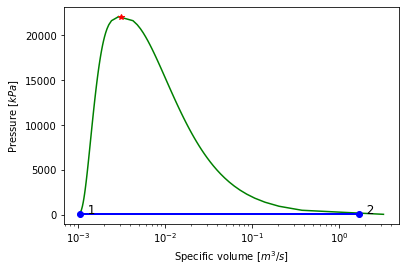

In [5]:
Pv_vapor_dome()
Pv_diagram(state1,state2)

We can also compute the heat transferred using entropy.  Recall that for a reversible process

$S_2 - S_1 = \int_1^2 \left( \dfrac{\delta Q}{T} \right)_{rev}$

Because the system's temperature is constant and the boiling process is reverisble, we can pull it out of the integral to get

$S_2 - S_1 = \dfrac{1}{T} \int_1^2 \delta Q = \dfrac{Q}{T}$

Rearraging this we get

$Q = T(S_2 - S_1) = mT(s_2 - s_1)$

In [6]:
s1 = state1.s          # specific entropy [J/kgK]
s2 = state2.s          # specific entropy [J/kgK]

Q = m*T1*(s2-s1)       # heat transferred [J]

print('Heat transferred =',Q/1000.0,'kJ')

Heat transferred = 4514.088877112119 kJ


We see that this method gives the exact same answer as we got earlier.

Using similar functions, we can plot this process on a T-s diagram, as follows.

In [7]:
def Ts_vapor_dome():
    
    w = ct.Water()
    
    # critical temperature and specific entropy
    Tcrit = w.critical_temperature    # critical temperature [K]
    vcrit = 1/w.critical_density      # critical specific volume [m^3/kg]
    w.TV = Tcrit, vcrit
    scrit = w.s                       # critical specific entropy [J/(kg*K)]

    # set up arrays for plotting saturated curves
    T_array = np.linspace(15+273.15,0.9999*Tcrit)   # the temperature range must stop just before the critical point
    sf_array = np.zeros_like(T_array)
    sg_array = np.zeros_like(T_array)

    # get saturated states for plotting
    for i in range(T_array.size):
        w.TX = T_array[i], 0        # saturated liquid (x = 0)
        sf_array[i] = w.s
    
        w.TX = T_array[i], 1        # saturated vapor (x = 1)
        sg_array[i] = w.s

    # plot saturated curves and critical point
    plt.semilogx(sf_array/1000.0,T_array-273.15,'g',sg_array/1000.0,T_array-273.15,'g',scrit/1000.0,Tcrit-273.15,'r*')
    plt.ylabel('Temperature [$^\circ C$]')
    plt.xlabel('Specific entropy [$kJ/(kg*K)$]')
    

In [8]:
def Ts_diagram(*args):
    
    T_states = np.zeros(len(args),)  # array to store temperatures at each state
    s_states = np.zeros(len(args),)  # array to store specific entropies at each state
    
    for i in range(len(args)):       # loop through each state in the process
        T_states[i] = args[i].T
        s_states[i] = args[i].s
        plt.text(s_states[i]/1000.0,T_states[i]-273.15,'  '+str(i+1),fontsize=12)
    plt.semilogx(s_states/1000.0,T_states-273.15,'bo-',linewidth=2)
    

<ipython-input-7-05d66850be77>:18: DeprecationWarning: To be removed after Cantera 2.5. Attribute renamed to 'TQ'
  w.TX = T_array[i], 0        # saturated liquid (x = 0)
<ipython-input-7-05d66850be77>:21: DeprecationWarning: To be removed after Cantera 2.5. Attribute renamed to 'TQ'
  w.TX = T_array[i], 1        # saturated vapor (x = 1)


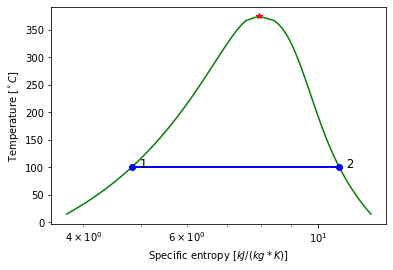

In [9]:
Ts_vapor_dome()
Ts_diagram(state1,state2)

<a id='approx'></a>

### Approximating Entropy Change

In this section, we'll look at some common formulas for approximating the change in entropy of a substance with respect to more easily measurable variables such as specific volume, pressure, and temperature.  We will first look at general formulas, then specific applications to incompressible liquids (and solids) and ideal gases.

Consider the energy balance of a closed system over a small increment of time $dt$:

$\delta Q - \delta W = dE = dU$

where we have ignored any changes in kinetic and potential energies.

If the onlly work done is to change the volume, then it can be written as

$\delta W = PdV$

Recall that we define changes in entropy in terms of the heat transferred during a reversible process:

$S_2 - S_1 = \int_1^2 \left( \dfrac{\delta Q}{T} \right)_{rev}$

so over a short time $dt$, then change in entropy is

$dS = \dfrac{\delta Q}{T}$

Substituting this into the first equation gives

$TdS - PdV = dU$

which, when divided by mass and rearranged, gives

$Tds = du + Pdv$

which is called the **First Gibbs Equation**

Also, the definition of specific enthalpy gives

$dh = d(u+ Pv) = du + vdP + Pdv$

and so substituting this into the First Gibbs Equation yields

$Tds = dh - vdP$

which is called the **Second Gibbs Equation**

#### Incompressible Liquids (and Solids)

If the substance is incompressible (for example, liquid water), then we can make the simplifying assumption that its volume does not change, i.e. $dv = 0$, no matter what process it undergoes.  In this case, the specific heats are the same,

$c_p = c_v \equiv c$

(because every process is constant volume), and we get by definition

$du = cdT$

Therefore,

$ds = \dfrac{du}{T}$

Integrating this equation from the beginning to the end of the process $1 \to 2$ gives

$s_2 - s_1 = \int\limits_1^2 \dfrac{c(T)}{T} dT$

where we note that in general specific heat is a function of temperature.  If we assume a constant or average value of $c(T)$, then this simplifies to

$s_2 - s_1 = c_{avg} \ln\left( \dfrac{T_2}{T_1} \right)$

Let's see how this formuala holds up compared to the "exact" entropy values given by Cantera.

In [10]:
# state 1
state1 = ct.Water()    # create water object
T1 = 20 + 273.15       # temperature [K]
P1 = 100.0e3           # pressure [Pa]
state1.TP = T1, P1     # set temperature and pressure
s1 = state1.s          # specific entropy [J/(kg*K)]

# state 2
state2 = ct.Water()    # create water object
T2 = 40 + 273.15       # temperature [K]
P2 = 100.0e3           # pressure [Pa]
state2.TP = T2, P2     # set temperature and pressure
s2 = state2.s          # specific entropy [J/(kg*K)]

s_exact = s2 - s1      # change in specific entropy [J/(kg*K)]

print('Exact specific entropy change =',s_exact/1000.0,'kJ/(kg*K)')

# use approximate formula with average specific heat
state3 = ct.Water()    # create water object
T3 = (T1+T2)/2.0       # temperature [K]
P3 = 100.0e3           # pressure [Pa]
state3.TP = T3, P3     # set temperature and pressure
c_avg = state3.cp      # specific heat [J/kg]

s_approx = c_avg*np.log(T2/T1)  # change in specific entropy [J/(kg*K)]
print('Approximate specific entropy change =',s_approx/1000.0,'kJ/(kg*K)')

print('Relative error =',(s_approx-s_exact)/s_exact*100.0,'%')

Exact specific entropy change = 0.2758527335191784 kJ/(kg*K)
Approximate specific entropy change = 0.2757798296614775 kJ/(kg*K)
Relative error = -0.02642854278470988 %


Let's try this again over a larger temperature range

In [11]:
# state 1
state1 = ct.Water()    # create water object
T1 = 10 + 273.15       # temperature [K]
P1 = 100.0e3           # pressure [Pa]
state1.TP = T1, P1     # set temperature and pressure
s1 = state1.s          # specific entropy [J/(kg*K)]

# state 2
state2 = ct.Water()    # create water object
T2 = 90 + 273.15       # temperature [K]
P2 = 100.0e3           # pressure [Pa]
state2.TP = T2, P2     # set temperature and pressure
s2 = state2.s          # specific entropy [J/(kg*K)]

s_exact = s2 - s1      # change in specific entropy [J/(kg*K)]

print('Exact specific entropy change =',s_exact/1000.0,'kJ/(kg*K)')

# use approximate formula with average specific heat
state3 = ct.Water()    # create water object
T3 = (T1+T2)/2.0       # temperature [K]
P3 = 100.0e3           # pressure [Pa]
state3.TP = T3, P3     # set temperature and pressure
c_avg = state3.cp      # specific heat [J/kg]

s_approx = c_avg*np.log(T2/T1)  # change in specific entropy [J/(kg*K)]
print('Approximate specific entropy change =',s_approx/1000.0,'kJ/(kg*K)')

print('Relative error =',(s_approx-s_exact)/s_exact*100.0,'%')

Exact specific entropy change = 1.0414583292552861 kJ/(kg*K)
Approximate specific entropy change = 1.039425780566525 kJ/(kg*K)
Relative error = -0.1951637076266474 %


So the error gets much larger over a larger temperature range, but it is still less than 1%.

#### Ideal Gases

If we can treat the gas as ideal, then we can employ the Ideal Gas Law to give us a relationship between pressure, temperature, and specific volume:

$Pv = RT$

where $R$ is the gas constant for the specific gas in question.

We will also utilize the following formula:

$R = c_p - c_v$

which we derived previously, and the following definition:

$k \equiv \dfrac{c_p}{c_v}$

which is the ratio of specific heats.

Starting with the First Gibbs Equation and the Ideal Gas Law, we can find

$ds = \dfrac{du}{T} + \dfrac{Pdv}{T} = \dfrac{c_v}{T}dT + \dfrac{R}{v}dv$

Integrating this equation from the beginning to the end of the process $1 \to 2$ gives

$s_2 - s_1 = \int\limits_1^2 \dfrac{c_v(T)}{T} dT + R \ln \left( \dfrac{V_2}{V_1} \right)$

where we note that in general specific heat is a function of temperature.  Like we did with incompressible liquids, if we assume a constant or average value of $c_v(T)$, then this simplifies to

$s_2 - s_1 = c_{v,avg} \ln\left( \dfrac{T_2}{T_1} \right) + R \ln \left( \dfrac{V_2}{V_1} \right)$

Using the Second Gibbs Equation, we can similarly get

$s_2 - s_1 = \int\limits_1^2 \dfrac{c_p(T)}{T} dT - R \ln \left( \dfrac{P_2}{P_1} \right)$

which approximates to

$s_2 - s_1 = c_{p,avg} \ln\left( \dfrac{T_2}{T_1} \right) - R \ln \left( \dfrac{P_2}{P_1} \right)$

Let's see how these formualas holds up compared to the "exact" entropy values given by Cantera.

In [12]:
# state 1
state1 = ct.Solution('air.xml', 'air')      # create air object
T1 = 20 + 273.15       # temperature [K]
P1 = 100.0e3           # pressure [Pa]
state1.TP = T1, P1     # set temperature and pressure
v1 = state1.v          # specific volume [m^3/kg]
s1 = state1.s          # specific entropy [J/(kg*K)]

# state 2
state2 = ct.Solution('air.xml', 'air')      # create air object
T2 = 40 + 273.15       # temperature [K]
P2 = 100.0e3           # pressure [Pa]
state2.TP = T2, P2     # set temperature and pressure
v2 = state2.v          # specific volume [m^3/kg]
s2 = state2.s          # specific entropy [J/(kg*K)]

s_exact = s2 - s1      # change in specific entropy [J/(kg*K)]

print('Exact specific entropy change =',s_exact/1000.0,'kJ/(kg*K)')

# use approximate formula with average specific heat
state3 = ct.Solution('air.xml', 'air')      # create air object
T3 = (T1+T2)/2.0       # temperature [K]
P3 = 100.0e3           # pressure [Pa]
state3.TP = T3, P3     # set temperature and pressure
cp_avg = state3.cp     # specific heat at constant pressure [J/kg]
cv_avg = state3.cv     # specific heat at constant volume [J/kg]
R = cp_avg - cv_avg    # gas constant [J/kg]

s_approx = cv_avg*np.log(T2/T1) + R*np.log(v2/v1)  # change in specific entropy [J/(kg*K)]
print('Approximate specific entropy change =',s_approx/1000.0,'kJ/(kg*K)')

print('Relative error =',(s_approx-s_exact)/s_exact*100.0,'%')

Exact specific entropy change = 0.06622009469124805 kJ/(kg*K)
Approximate specific entropy change = 0.06622056813615856 kJ/(kg*K)
Relative error = 0.0007149565592120208 %


Let's try this again over a larger temperature range

In [13]:
# state 1
state1 = ct.Solution('air.xml', 'air')      # create air object
T1 = 20 + 273.15       # temperature [K]
P1 = 100.0e3           # pressure [Pa]
state1.TP = T1, P1     # set temperature and pressure
v1 = state1.v          # specific volume [m^3/kg]
s1 = state1.s          # specific entropy [J/(kg*K)]

# state 2
state2 = ct.Solution('air.xml', 'air')      # create air object
T2 = 400+ 273.15       # temperature [K]
P2 = 100.0e3           # pressure [Pa]
state2.TP = T2, P2     # set temperature and pressure
v2 = state2.v          # specific volume [m^3/kg]
s2 = state2.s          # specific entropy [J/(kg*K)]

s_exact = s2 - s1      # change in specific entropy [J/(kg*K)]

print('Exact specific entropy change =',s_exact/1000.0,'kJ/(kg*K)')

# use approximate formula with average specific heat
state3 = ct.Solution('air.xml', 'air')      # create air object
T3 = (T1+T2)/2.0       # temperature [K]
P3 = 100.0e3           # pressure [Pa]
state3.TP = T3, P3     # set temperature and pressure
cp_avg = state3.cp     # specific heat at constant pressure [J/kg]
cv_avg = state3.cv     # specific heat at constant volume [J/kg]
R = cp_avg - cv_avg    # gas constant [J/kg]

s_approx = cv_avg*np.log(T2/T1) + R*np.log(v2/v1)  # change in specific entropy [J/(kg*K)]
print('Approximate specific entropy change =',s_approx/1000.0,'kJ/(kg*K)')

print('Relative error =',(s_approx-s_exact)/s_exact*100.0,'%')

Exact specific entropy change = 0.8525356032541904 kJ/(kg*K)
Approximate specific entropy change = 0.8541761188642495 kJ/(kg*K)
Relative error = 0.19242781225758968 %


<a id='isoeff'></a>

### Isentropic Efficiency

When we talk about the efficiency of a process, we usually mean the ratio of the actual performance over the idealized performance.  In the study of Thermodynamics, "idealized" means that no entropy is generated, i.e. the process is reversible.  If we also assume that heat transfer is negligible (which is accurate for devices like pumps, compressors, and turbines), then the ideal process is **isentropic**.


Let's take a look at a specific case, where we can visualize what this means.  The following figure shows the operation of a turbine with inlet pressure $P_1$ and outlet pressure $P_2$.  Note that as energy is extracted from the fluid, its pressure drops.

<img src="https://github.com/AdaWick/CDS/blob/master/Thermodynamics/images/isentropic efficiency T-s diagram.png?raw=true" width="500">

Two different paths for this process are shown in the diagram.  The solid line is an idealized, reversible process; notice that the specific entropy $s$ does not change between the inlet and the outlet.  We denote the outlet of this process as "2s" to indicate that $s$ does not change ($s_1 = s_{2s}$).

A more realistic process is shown with a dotted line; here, specific entropy increases during the process ($s_2 > s_1$).

Assuming no heat transfer or changes in potential or kinetic energy, the rate of work output from a turbine is given by

$\dot{W} = \dot{m}(h_1 - h_2)$

or, per unit mass,

$\dfrac{\dot{W}}{\dot{m}} = h_1 - h_2$

To denote the idealized turbine, we again use the "s" subscript:

$\left( \dfrac{\dot{W}}{\dot{m}} \right)_s = h_1 - h_{2s}$

Finally, we define the **isentropic efficiency** of the turbine by

$\eta_t = \dfrac{\dot{W}/\dot{m}}{(\dot{W}/\dot{m})_s} = \dfrac{h_1 - h_2}{h_1 - h_{2s}}$

Other steady flow components have similar expressions for their isentropic efficiencies.  For example, a compressor's isentropic efficiency is defined by

$\eta_c = \dfrac{h_{2s} - h_1}{h_2 - h_1}$


**Example:** A steam turbine's inlet temperature and pressure are $T_1 = 500 ^\circ C, P_1 = 3 MPa$, and its outlet pressure is $P_2 = 0.6 MPa$.  It generates $\dot{W} = 177.7 MW$ of power with as mass flow rate of $\dot{m} = 450 kg/s$.  Find the outlet temperature $T_2$ and the isentropic efficiency $\eta_t$.

Assume there is no heat transfer or change in kinetic and potential energy.

Let's summarize what we know about the two states of this process:

**State 1:**  ***Known:*** $T_1, P_1$, ***Unknown:*** $h_1$

**State 2:**  ***Known:*** $P_2$, ***Unknown:*** $T_2, h_2$

Once we calculate $h_1$, we can get $h_2$ from conservation of energy, using our assumptions:

$\dot{W} = \dot{m}(h_1 - h_2)$

Solving for $h_2$ gives

$h_2 = h_1 - \dfrac{\dot{W}}{\dot{m}}$


In [14]:
Wdot = 177.7e6         # rate of work done by turbine [W]
mdot = 450             # mass flow rate [kg/s]

# state 1 (inlet)
state1 = ct.Water()    # create water object
P1 = 3.0e6             # pressure [Pa]
T1 = 500 + 273.15      # temperature [K]
state1.TP = T1, P1     # set temperature and pressure
h1 = state1.h          # specific enthalpy [J/kg]
s1 = state1.s          # specific entropy [J/(kg*K)]

# state 2 (outlet)
state2 = ct.Water()    # create water object
P2 = 0.6e6             # pressure [Pa]
h2 = h1 - Wdot/mdot    # specific enthalpy [J/kg]
state2.HP = h2, P2     # set pressure and specific enthalpy
T2 = state2.T          # temperature [K]

print('T2 =',T2 - 273.15,'C')

# ideal state 2 (outlet)
state2s = ct.Water()   # create water object
s2s = s1               # set specific entropy equal to inlet [J/(kg*K)]
state2s.SP = s2s, P2   # set pressure and specific entropy
h2s = state2s.h

eta_t = (h1-h2)/(h1-h2s)

print ('Isentropic efficiency =',eta_t)

T2 = 299.98303139499694 C
Isentropic efficiency = 0.8371699987258965


<a id='balance'></a>

### Accounting for Entropy Balance in Thermodynamic Processes

At the beginning of this notebook, we derived the following equation for entropy balance in a **closed system**:

$\Delta S_{sys} = \int_1^2 \left( \dfrac{\delta Q}{T} \right)_{irrev} + S_{gen}$

which states that the change of entropy in a system, $\Delta S_{sys}$, is due to entropy transfer due to heating or cooling, $\int_1^2 \left( \dfrac{\delta Q}{T} \right)_{irrev}$ plus any entropy generated by an irreversible process $S_{gen}$.

However, as engineers we are mostly interested in the entropy production (and hence isentropic efficiency) of steady flow processes that are described as **open systems** or **control volumes**.  The Reynolds Transport Theorem gives us a way to translate equations for closed systems into equations for control volumes, giving us

$\Delta S_{sys} = \Delta S_{cv} + S_{out} - S_{in}$

So we just need to account for the net entropy flowing out of the system during the process, $S_{out} - S_{in}$.  Substituting this equation into the first one gives

$\Delta S_{cv} = \int_1^2 \left( \dfrac{\delta Q}{T} \right)_{irrev} + S_{in} - S_{out} + S_{gen}$

Differentiating this equation with respect to time yields

$\dot{S}_{cv} = \oint \left( \dfrac{\delta \dot{Q}}{T} \right)_{irrev} + \sum\limits_{\text{inlets}} \dot{m}s - \sum\limits_{\text{outlets}} \dot{m}s + \dot{S}_{gen}$

where the integration is carried out over the surface of the control volume.

Since most processes of interest are steady with respect to time, we can set $\dot{S}_{cv} = 0$.  Also, most processes have one inlet and one outlet, which leaves us with

$\dot{S}_{gen} = \dot{m}(s_2 - s_1) - \oint \left( \dfrac{\delta \dot{Q}}{T} \right)_{irrev}$

where point 2 is the outlet and point 1 is the inlet.


**Example:** Air enters a compressor at a pressure $P_1 = 100 kPa$ and temperature $T_1 = 300 K$.  It leaves the compressor at a pressure $P_2 = 1.2 MPa$ and temperature $T_2 = 620 K$.  The air then passes through one side of a heat exchanger, leaving with a pressure $P_3 = 1.2 MPa$ and temperature $T_3 = 760 K$.  A separate flow of air enters the other side of the heat exchanger at pressure $P_4 = 100 kPa$ and temperature $T_4 = 780 K$ and leaves at pressure $P_5 = 100 kPa$.  The compressor requires $\dot{W} = 6700 kW$ of power to run.  Assume all flow rates are equal and the compressor and heat exhanger are insulated.

Find: the mass flow rate $\dot{m}$, temperature $T_5$, and the entropy generated $\dot{S}_{gen}$ by the compressor and the heat exchanger.

We will make the following common assumptions: first that the system is operating in steady state, and second that the potential and kinetic energies of the air do not vary greatly throughout the system.

<img src="https://github.com/AdaWick/CDS/blob/master/Thermodynamics/images/entropy CV balance ex.png?raw=true" width="500">

Let's first write mass and energy balances for the compressor.  Mass balance gives

$\dot{m}_1 = \dot{m}_2$

This is usually the case for most devices, which have one inlet and one outlet.  So we will declare

$\dot{m} \equiv \dot{m}_1 = \dot{m}_2$

This simplifies the energy balance as follows:

$\underbrace{\dot{Q}}_{=0} - \dot{W} = \dot{m}(h_2 - h_1)$

Let's summarize what we know about the two states of this process:

**State 1:**  ***Known:*** $P_1, T_1$, ***Unknown:*** $h_1$

**State 2:**  ***Known:*** $P_2, T_2$, ***Unknown:*** $h_2$

Once we have the enthalpies and the inlet and outlet, we can compute the mass flow rate using

$\dot{m} = \dfrac{-\dot{W}}{h_2 - h_1}$

In [15]:
Wdot = -6700.0e3        # rate of work output from compressor [W]

# state 1
state1 = ct.Solution('air.xml', 'air')      # create air object
T1 = 300               # temperature [K]
P1 = 100.0e3           # pressure [Pa]
state1.TP = T1, P1     # set temperature and pressure
h1 = state1.h          # specific enthalpy [J/kg]

# state 2
state2 = ct.Solution('air.xml', 'air')      # create air object
T2 = 620               # temperature [K]
P2 = 1.2e6             # pressure [Pa]
state2.TP = T2, P2     # set temperature and pressure
h2 = state2.h          # specific enthalpy [J/kg]

# compute mass flow rate using energy balance
mdot = -Wdot/(h2-h1)   # mass flow rate [kg/s]

print('Mass flow rate =',mdot,'kg/s')

Mass flow rate = 20.418968812332707 kg/s


For the heat exchanger, we can write the following energy balance:

$\underbrace{\dot{Q}}_{=0} - \underbrace{\dot{W}}_{=0} = \dot{m}(h_3 + h_5 - h_2 - h_4)$

(Notice the signs of the enthalpy terms!)

Let's summarize what we know about the four states of this process:

**State 2:**  ***Known:*** $h_2$

**State 3:**  ***Known:*** $P_3, T_3$, ***Unknown:*** $h_3$

**State 4:**  ***Known:*** $P_4, T_4$, ***Unknown:*** $h_4$

**State 5:**  ***Known:*** $P_5$, ***Unknown:*** $h_5, T_5$

Once we have the enthalpies at locations 3 and 4, we can compute $h_5$, and then determine $T_5$, using

$h_5 = h_2 - h_3 + h_4$


In [16]:
# state 3
state3 = ct.Solution('air.xml', 'air')      # create air object
T3 = 760               # temperature [K]
P3 = 1.2e6             # pressure [Pa]
state3.TP = T3, P3     # set temperature and pressure
h3 = state3.h          # specific enthalpy [J/kg]

# state 4
state4 = ct.Solution('air.xml', 'air')      # create air object
T4 = 780               # temperature [K]
P4 = 100e3             # pressure [Pa]
state4.TP = T4, P4     # set temperature and pressure
h4 = state4.h          # specific enthalpy [J/kg]

# state 5
state5 = ct.Solution('air.xml', 'air')      # create air object
P5 = 100e3             # presure [Pa]
h5 = h2 - h3 + h4      # specific enthalpy [J/kg]
state5.HP = h5, P5     # set specific enthalpy and pressure
T5 = state5.T          # temperature [K]

print('T5 =',T5,'K')

T5 = 640.6294582334796 K


Moving on to the entropy generated, we can use the last equation we derived before the start of this example:

$\dot{S}_{gen} = \dot{m}(s_2 - s_1) - \underbrace{\oint \left( \dfrac{\delta \dot{Q}}{T} \right)_{irrev}}_{=0}$

for the compressor, and

$\dot{S}_{gen} = \dot{m}(s_3 + s_5 - s_2 - s_4) - \underbrace{\oint \left( \dfrac{\delta \dot{Q}}{T} \right)_{irrev}}_{=0}$

for the heat exchanger.

In [17]:
s1 = state1.s          # specific entropy [J/(kg*K)]
s2 = state2.s          # specific entropy [J/(kg*K)]
s3 = state3.s          # specific entropy [J/(kg*K)]
s4 = state4.s          # specific entropy [J/(kg*K)]
s5 = state5.s          # specific entropy [J/(kg*K)]

Sdot_comp = mdot*(s2 - s1)                 # rate of entropy generation for compressor [W/K]
Sdot_heatex = mdot*(s3 + s5 - s2 - s4)     # rate of entropy generation for heat exchanger [W/K]

print('Rate of entropy generation for compressor =',Sdot_comp/1000.0,'kW/K')
print('Rate of entropy generation for heat exchanger =',Sdot_heatex/1000.0,'kW/K')

Rate of entropy generation for compressor = 0.5925472854672463 kW/K
Rate of entropy generation for heat exchanger = 0.12809737321144518 kW/K
